# VGG19 - Model


In [28]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [29]:
IMAGE_SIZE = [224, 224]

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#Give dataset path
train_path = '/content/drive/MyDrive/archive-3/train'
test_path = '/content/drive/MyDrive/archive-3/test'

Working with 200 images
Image examples: 
test_polyps_ (108).jpg


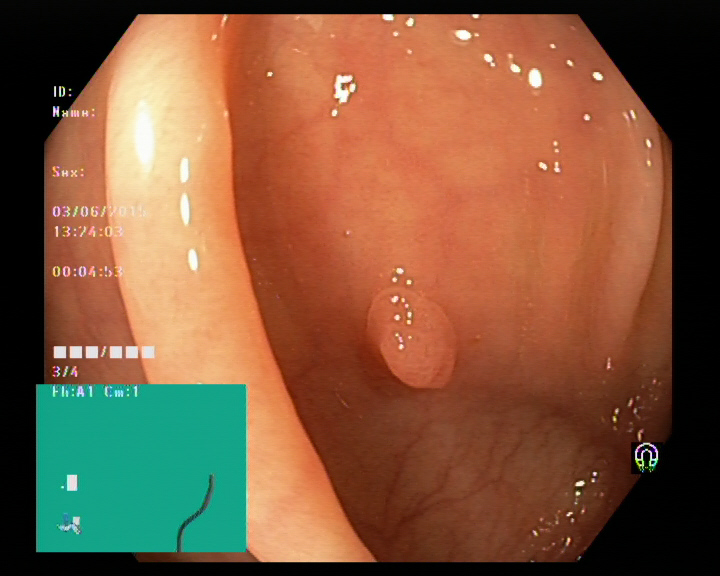

test_polyps_ (154).jpg


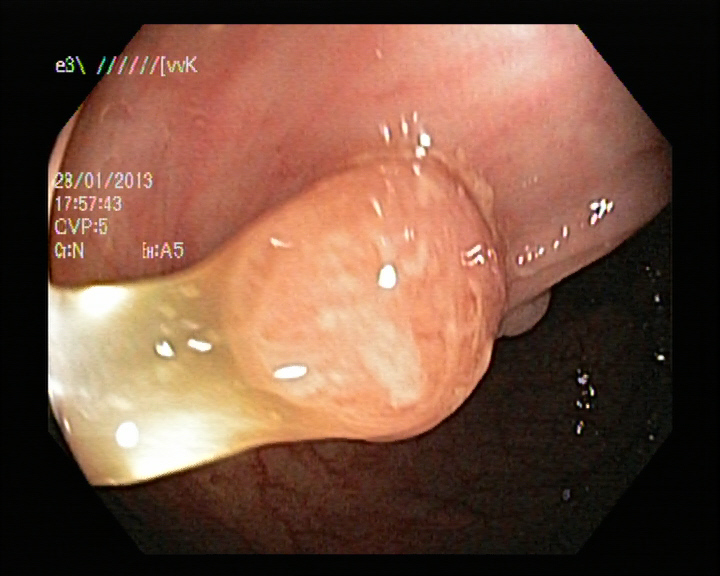

test_polyps_ (131).jpg


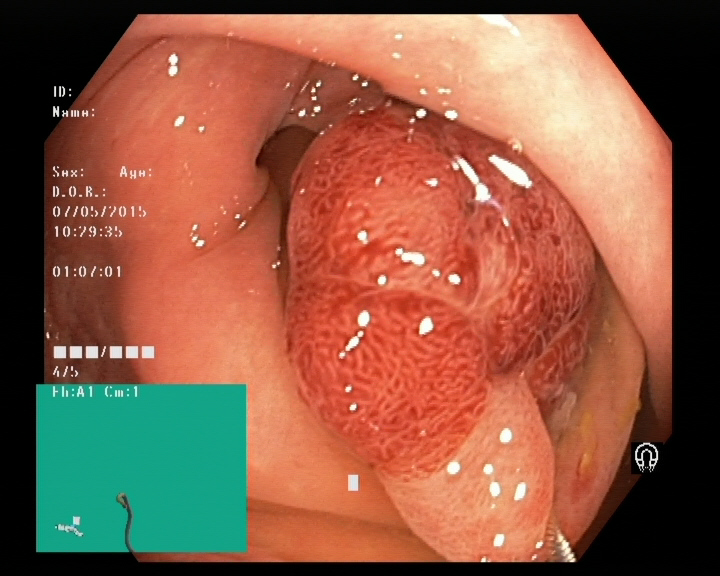

test_polyps_ (112).jpg


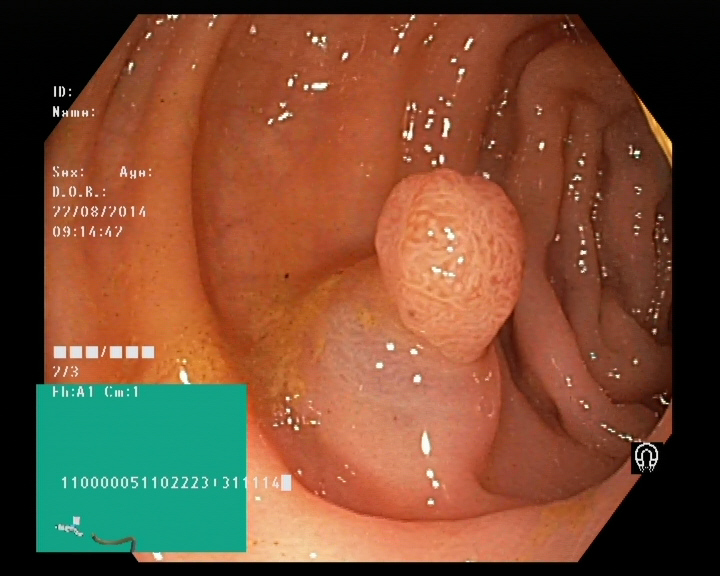

test_polyps_ (126).jpg


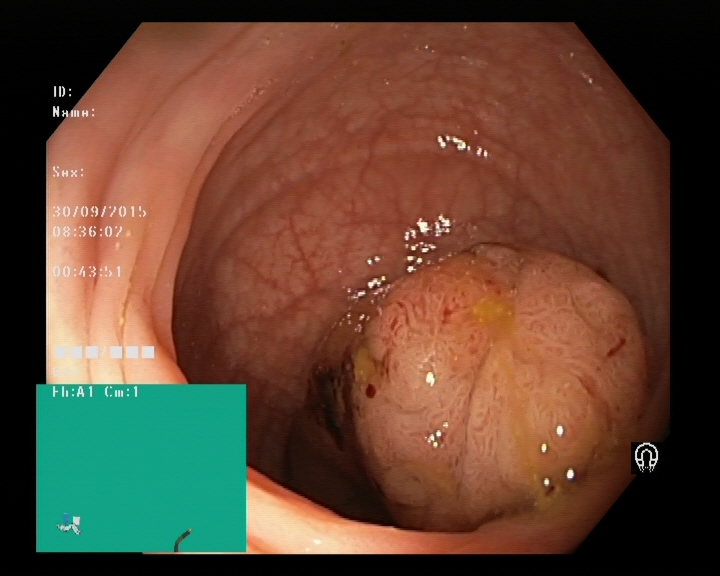

test_polyps_ (132).jpg


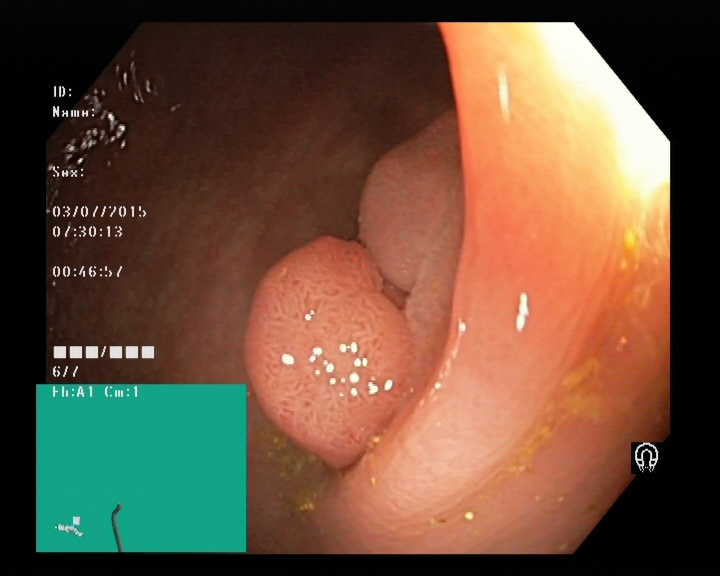

test_polyps_ (116).jpg


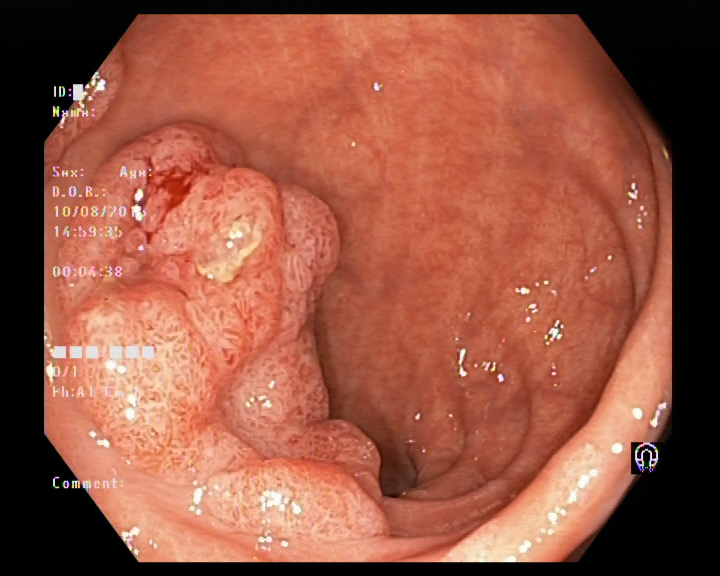

test_polyps_ (106).jpg


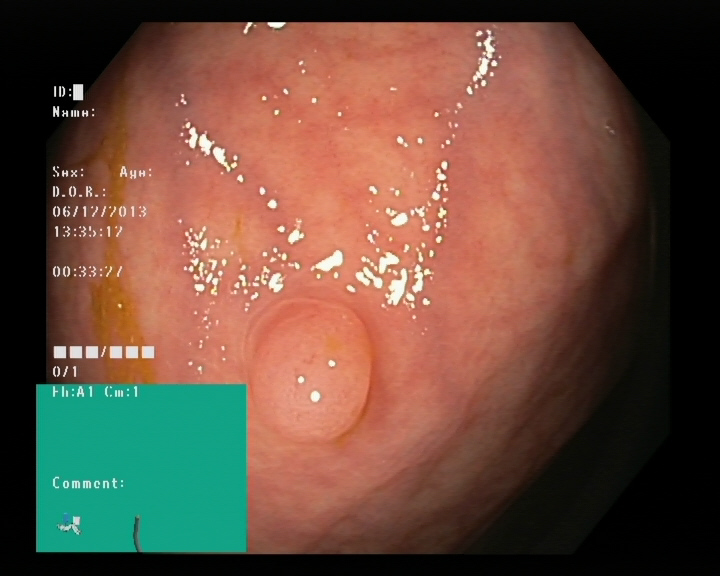

test_polyps_ (123).jpg


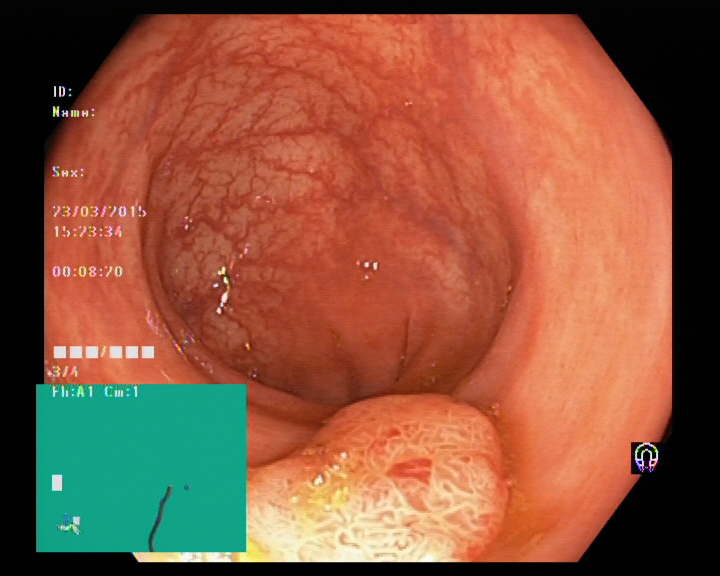

test_polyps_ (159).jpg


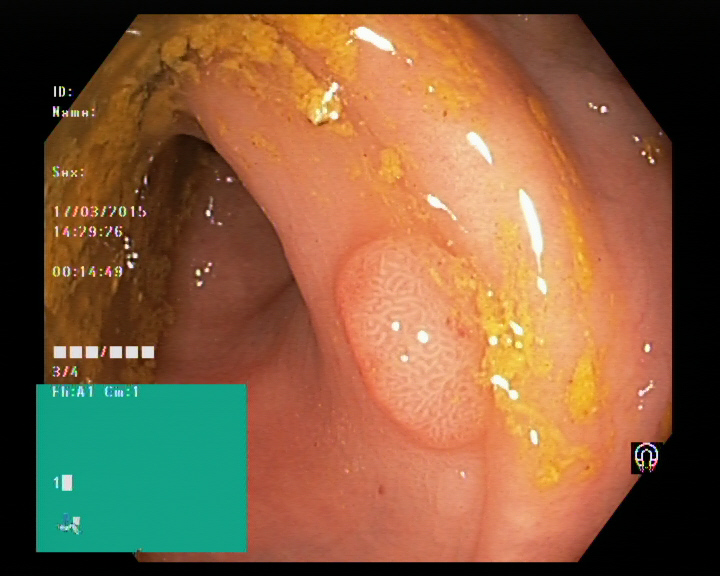

In [32]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object


folder = '/content/drive/MyDrive/archive-3/test/2_polyps'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [33]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 3s 0us/step


In [34]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [35]:
for layer in vgg.layers:
  layer.trainable = False

In [36]:
x = Flatten()(vgg.output)
prediction = Dense(4, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [37]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [38]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [39]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [40]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3200 images belonging to 4 classes.


In [41]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 800 images belonging to 4 classes.


In [42]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5',
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

<ipython-input-42-4a1a319319e3>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/10



Epoch 1: val_loss improved from inf to 2.58111, saving model to mymodel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 - 53s - loss: 5.5098 - accuracy: 0.3875 - val_loss: 2.5811 - val_accuracy: 0.5788 - 53s/epoch - 11s/step
Epoch 2/10


5/5 - 29s - loss: 2.1192 - accuracy: 0.7188 - 29s/epoch - 6s/step
Epoch 3/10


5/5 - 21s - loss: 1.0537 - accuracy: 0.8625 - 21s/epoch - 4s/step
Epoch 4/10


5/5 - 20s - loss: 1.0479 - accuracy: 0.8625 - 20s/epoch - 4s/step
Epoch 5/10


5/5 - 21s - loss: 1.0425 - accuracy: 0.8813 - 21s/epoch - 4s/step
Epoch 6/10


5/5 - 18s - loss: 1.0278 - accuracy: 0.9000 - 18s/epoch - 4s/step
Epoch 7/10


5/5 - 18s - loss: 0.9174 - accuracy: 0.9000 - 18s/epoch - 4s/step
Epoch 8/10


5/5 - 17s - loss: 1.2551 - accuracy: 0.8938 - 17s/epoch - 3s/step
Epoch 9/10


5/5 - 18s - loss: 0.6647 - accuracy: 0.9250 - 18s/epoch - 4s/step
Epoch 10/10


5/5 - 12s - loss: 0.4848 - accuracy: 0.9250 - 12s/epoch - 2s/step
Training completed in time:  0:04:29.374654


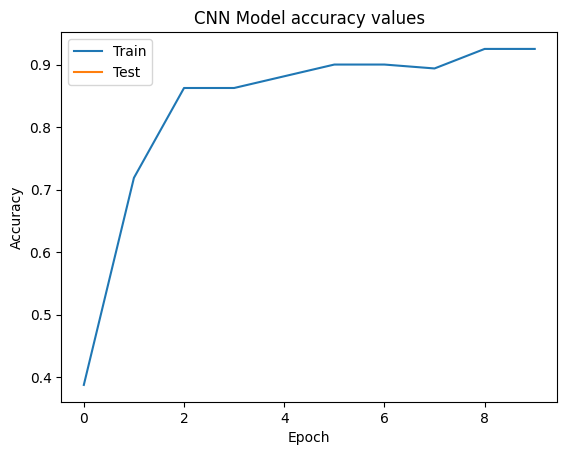

In [43]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [44]:
model.evaluate(test_set)

25/25 [==============================] - 22s 859ms/step - loss: 1.3262 - accuracy: 0.8288


[1.3261544704437256, 0.8287500143051147]

1/1 [==============================] - 0s 162ms/step
[[0.000000e+00 0.000000e+00 9.999994e-01 6.527362e-07]]
THE UPLOADED IMAGE SEEMS TO BE: Polyp


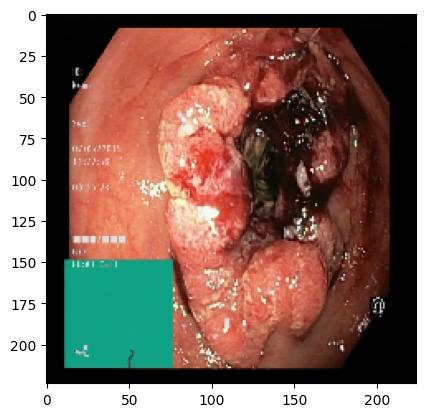

In [45]:
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Gastrovision-2/Colorectal cancer/02c18e5f-6c77-4104-bff2-238f587b1c28.jpg',target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
    op="Normal"
elif a==1:
    op="Ulcerative colitis"
elif a==2:
    op="Polyp"
else:
    op="Esophagitis"

plt.imshow(img)
print("THE UPLOADED IMAGE SEEMS TO BE: "+str(op))

1/1 [==============================] - 0s 34ms/step
[[1.000000e+00 0.000000e+00 9.900392e-33 5.133022e-11]]
THE UPLOADED IMAGE SEEMS TO BE: Normal


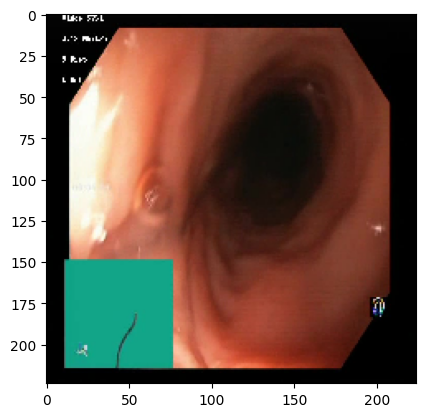

In [46]:
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/archive-3/test/0_normal/test_normal_ (112).jpg',target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
    op="Normal"
elif a==1:
    op="Ulcerative colitis"
elif a==2:
    op="Polyp"
else:
    op="Esophagitis"

plt.imshow(img)
print("THE UPLOADED IMAGE SEEMS TO BE: "+str(op))

1/1 [==============================] - 0s 18ms/step
[[8.1465789e-17 3.9006489e-34 1.7078305e-17 1.0000000e+00]]
THE UPLOADED IMAGE SEEMS TO BE: Esophagitis


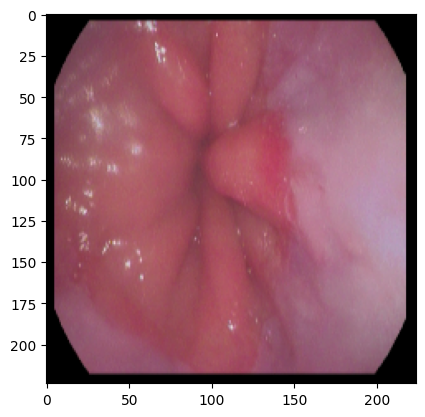

In [47]:
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Gastrovision-2/Esophagitis/0ad8f762-0fa6-46fd-b98d-a1b401f5ca5c.jpg',target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
    op="Normal"
elif a==1:
    op="Ulcerative colitis"
elif a==2:
    op="Polyp"
else:
    op="Esophagitis"

plt.imshow(img)
print("THE UPLOADED IMAGE SEEMS TO BE: "+str(op))